## Activity 1 - Clustering

   customer_id  gender  age  annual_income  spending_score
0            1    Male   19             15              39
1            2    Male   21             15              81
2            3  Female   20             16               6
3            4  Female   23             16              77
4            5  Female   31             17              40
       customer_id         age  annual_income  spending_score
count   200.000000  200.000000     200.000000      200.000000
mean    100.500000   38.850000      60.560000       50.200000
std      57.879185   13.969007      26.264721       25.823522
min       1.000000   18.000000      15.000000        1.000000
25%      50.750000   28.750000      41.500000       34.750000
50%     100.500000   36.000000      61.500000       50.000000
75%     150.250000   49.000000      78.000000       73.000000
max     200.000000   70.000000     137.000000       99.000000


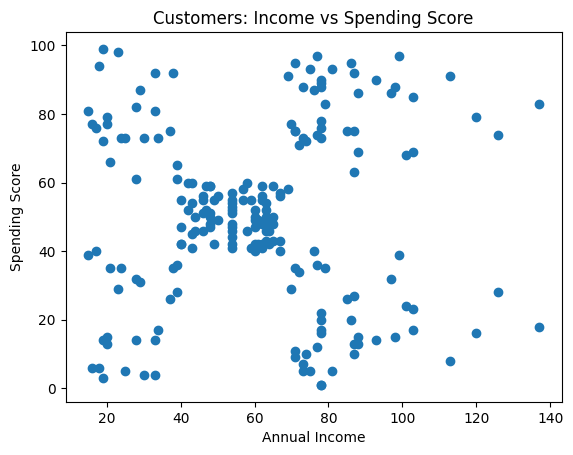

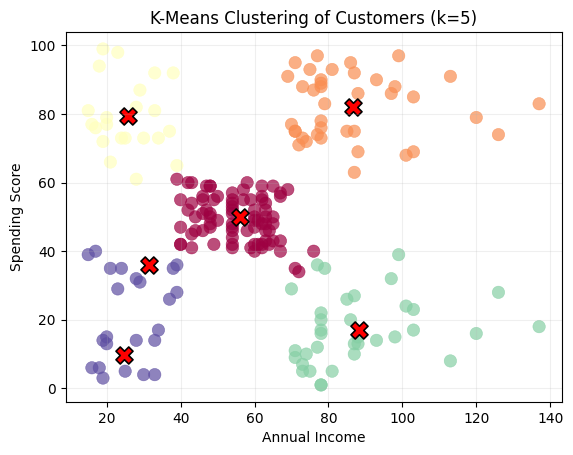

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Load dataset
url = "https://gist.githubusercontent.com/ryanorsinger/cc276eea59e8295204d1f581c8da509f/raw/mall_customers.csv"
df = pd.read_csv(url)

# 2. Display first 5 rows and summary
print(df.head())
print(df.describe())


# 3. Select features
X = df[['annual_income', 'spending_score']]

# 4. Scatter plot of features
plt.scatter(X['annual_income'], X['spending_score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customers: Income vs Spending Score')
plt.show()

# 5. Choose k (students decide)
k = 5

# 6. Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 7. Visualize clusters (sunset colors)
plt.scatter(
    X['annual_income'],
    X['spending_score'],
    c=y_kmeans,
    cmap='Spectral',
    s=80,               # bigger dots for impact
    alpha=0.7,
    linewidth=0.4
)

# Plot centroids
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='red',
    s=150,
    marker='X',
    edgecolor='black',
    linewidth=1.2,
    label='Centroids'
)


# Labels & title
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title(f'K-Means Clustering of Customers (k={k})')

# Add grid for cleaner readability
plt.grid(alpha=0.2)

plt.show()

**Write a short interpretation:**

1. What do the clusters represent?

*The clusters represents the group of customers with similar spending behavior and annual income. Each color in the K-Means plot highlights a different customer group. Basically, the model is grouping customers into meaningful categories based on how much they earn and how much they tend to spend.*

2. Which group are high spenders?

*Using k value at five, I observed that there are two group clusters who are high spenders. This two clusters are __A. Low Annual Income Customers with High Spending__ and __B. High Annual Income with High Spending__. because these clusters are located at the upper-right area of the scatterplot (high income + high spending score).*

3. Are there clear segments?

*Yes, the scatterplot shows clear and separable segments, meaning customers naturally fall into groups—low income & low spenders, high income & high spenders, average income but high spenders, etc. The distances between centroids indicate that the model successfully identified distinct behavior patterns, making segmentation useful.*

## Activity 2 - Assocation Rule Mining

Apply the Apriori algorithm to the following transactions


| TransactionID | Items                          |
| ------------- | ------------------------------ |
| T1            | Notebook, Pen, Water Bottle    |
| T2            | Coffee, Sandwich, Notebook     |
| T3            | Pen, Highlighter, Notebook     |
| T4            | Coffee, Energy Drink, Sandwich |
| T5            | Notebook, Pen, Laptop Sticker  |
| T6            | Coffee, Sandwich, Energy Drink |
| T7            | Pen, Notebook, Coffee          |
| T8            | Laptop Sticker, Notebook, Pen  |
| T9            | Coffee, Pen, Sandwich          |
| T10           | Energy Drink, Notebook, Pen    |



**Your Tasks**

    1. Load the dataset using pandas
    2. Convert to one-hot encoding using TransactionEncoder.
    3. Run Apriori: min_support=0.3
    4. Generate association rules: metric="lift".
    5. Display:
        - Frequent itemsets
        - Rules sorted by confidence
    6. Create at least one visualization:
        - Scatterplot (support vs confidence, lift as size)
    7. Write a short interpretation for the top 3 rules.

Frequent Itemsets:
    support            itemsets
0      0.5            (Coffee)
1      0.3      (Energy Drink)
2      0.7          (Notebook)
3      0.7               (Pen)
4      0.4          (Sandwich)
5      0.4  (Coffee, Sandwich)
6      0.6     (Notebook, Pen)

Association Rules:
   antecedents consequents  support  confidence     lift
1  (Sandwich)    (Coffee)      0.4    1.000000  2.00000
2  (Notebook)       (Pen)      0.6    0.857143  1.22449
3       (Pen)  (Notebook)      0.6    0.857143  1.22449
0    (Coffee)  (Sandwich)      0.4    0.800000  2.00000


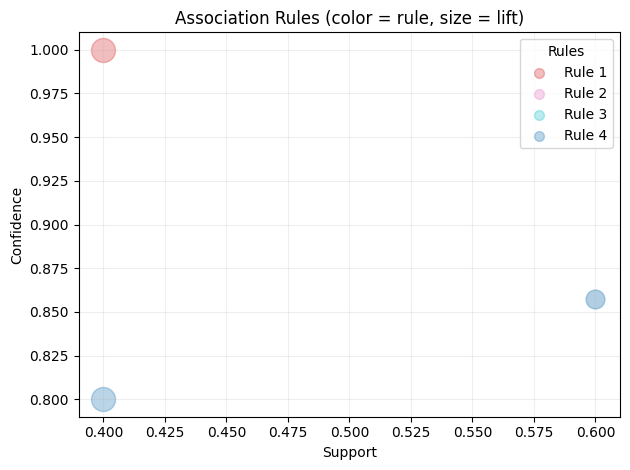

In [68]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Student transaction dataset
dataset = [
    ["Notebook", "Pen", "Water Bottle"],             # T1
    ["Coffee", "Sandwich", "Notebook"],              # T2
    ["Pen", "Highlighter", "Notebook"],              # T3
    ["Coffee", "Energy Drink", "Sandwich"],          # T4
    ["Notebook", "Pen", "Laptop Sticker"],           # T5
    ["Coffee", "Sandwich", "Energy Drink"],          # T6
    ["Pen", "Notebook", "Coffee"],                   # T7
    ["Laptop Sticker", "Notebook", "Pen"],           # T8
    ["Coffee", "Pen", "Sandwich"],                   # T9
    ["Energy Drink", "Notebook", "Pen"],             # T10
]

# One-hot encode
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori
frequent_items = apriori(df, min_support=0.3, use_colnames=True)
print("Frequent Itemsets:\n", frequent_items)

# Generate association rules
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by="confidence", ascending=False)
print("\nAssociation Rules:\n",
      rules[['antecedents','consequents','support','confidence','lift']])

# Create color map with as many colors as rules
colors = plt.cm.tab10(np.linspace(0, 1, len(rules)))

scatter_points = []
for i, row in rules.iterrows():
    sc = plt.scatter(
        row['support'],
        row['confidence'],
        s=row['lift'] * 150,
        color=colors[i],
        alpha=0.3
    )
    scatter_points.append(sc)

plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules (color = rule, size = lift)')

# Legend with fixed bubble size
handles = []
labels = []

for i, sc in enumerate(scatter_points):
    handles.append(sc)
    labels.append(f"Rule {i+1}")

legend = plt.legend(
    handles,
    labels,
    title="Rules",
    loc='upper right',
    scatterpoints=1
)

handles = legend.legendHandles if hasattr(legend, "legendHandles") else legend.legend_handles
for h in handles:
    h.set_sizes([50])

plt.tight_layout()
plt.grid(alpha=0.2)

plt.show()

**Short interpretation:**

*The association rule findings shows two strong purchasing patterns among students. First, food items show a highly consistent pairing: every student who buys a Sandwich also buys Coffee (confidence = 1.0, lift = 2.0), and Coffee buyers also purchase Sandwiches frequently (confidence = 0.80, lift = 2.0), indicating these items occur together twice as often as expected by chance. Second, school supplies items shows a strong bidirectional relationship, where Notebook → Pen and Pen → Notebook both have high confidence (0.857) and strong support (0.60), confirming that students almost always purchase these items together. Overall, all rules have lift values greater than 1, showing that the associations are meaningful and reflect real behavioral patterns rather than random co-occurrence.*